<a href="https://colab.research.google.com/github/skpadhy33/RLProjects/blob/dev%2Fskpadhy33%2FSensorNetworkProblem/WirelessSensorsNetwork/sensor_network_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Environment 0
Starting episode 0
state, action, (completion_reward, energy_reward), is_terminal
(0, 8, (0, -0.6), False)
(8, 9, (1, -0.2), True)
Starting episode 1
state, action, (completion_reward, energy_reward), is_terminal
(0, 5, (0, -0.8), False)
(5, 6, (0, -0.2), True)
Starting episode 2
state, action, (completion_reward, energy_reward), is_terminal
(0, 4, (0, -0.2), False)
(4, 9, (1, -0.6), True)
Starting episode 3
state, action, (completion_reward, energy_reward), is_terminal
(0, 4, (0, -0.2), False)
(4, 9, (1, -0.6), True)
Starting episode 4
state, action, (completion_reward, energy_reward), is_terminal
(0, 3, (0, -0.6), False)
(3, 8, (0, -0.2), False)
(8, 9, (1, -0.2), True)
Environment 1
Starting episode 0
state, action, (completion_reward, energy_reward), is_terminal
(0, 9, (1, -0.6), True)
Starting episode 1
state, action, (completion_reward, energy_reward), is_terminal
(0, 3, (0, -0.8), False)
(3, 4, (0, -0.0), False)
(4, 5, (0, -0.4), False)
(5, 8, (0, -0.6), False)
(8, 

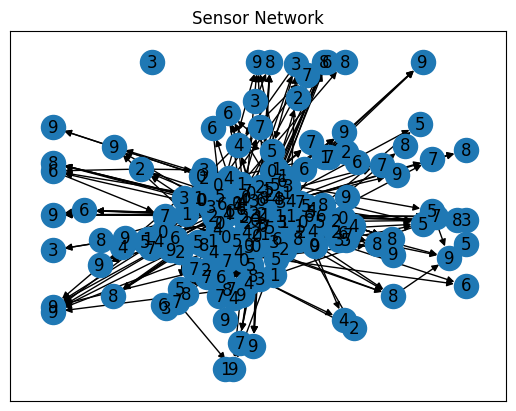

In [1]:
# Import statements
import numpy as np
import pandas as pd
import networkx as nx
from random import random
from itertools import combinations

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Wireless sensors environment class

class wireless_sensors_env:

  def __init__(self, env_params: {}):
    self.num_nodes = env_params['num_nodes']
    self.probability = env_params['transmission_probability']
    self.min_energy = env_params['min_energy']
    self.max_energy = env_params['max_energy']
    self.current_state = None
    # Set terminal node
    self.terminal_state = self.num_nodes - 1
    # Cunstruct network as per the parameters provided
    self.network = self.construct_valid_network()

  def construct_valid_network(self):
    """ Constructs a valid network. A valid network must have the starting and  terminating nodes connected. """
    network = self.construct_network()
    while not self.is_network_valid(network):
      network = self.construct_network()
    return network

  def is_network_valid(self, network):
    """ We perform DFS on the network to check if there exists a path from the starting node to the terminal node. """
    return self.perform_dfs(network, 0, set())

  def perform_dfs(self, network, current_node, visited_nodes):
    """ Performs DFS of the terminal_node in the connected component of starting state. """
    if self.terminal_state == current_node:
      return True
    visited_nodes.add(current_node)
    adj_nodes = set(network[current_node])
    for node in adj_nodes:
      if node not in visited_nodes:
        if self.perform_dfs(network, node, visited_nodes):
          return True
    return False

  def construct_network(self):
    V = set([v for v in range(self.num_nodes)])
    E = set()
    for combination in combinations(V, 2):
      a = random()
      if a < self.probability:
        # u and v are the two nodes, edge runs from u to v
        u, v = combination
        # w is the cost of transmitting from node u to v
        w = np.random.randint(self.min_energy, self.max_energy)
        E.add((u, v, w))
    # g is a directed graph
    g = nx.DiGraph()
    g.add_nodes_from(V)
    g.add_weighted_edges_from(E)
    return g

  def get_nodes(self):
    return list(self.network.nodes)

  def get_edges(self):
    return list(self.network.nodes)

  def draw_network(self):
    pos = nx.spring_layout(self.network)
    # nx.draw(self.network, with_labels=True)
    nx.draw_networkx(self.network) #, pos)
    plt.title("Sensor Network")
    # plt.show()

  def reset(self):
    """ Called to reset the environment and start over the episode. Returns (state, reward, is_terminal)"""
    self.current_state = 0
    is_terminal = False
    if len(list(self.network[self.current_state])) == 0:
      is_terminal = True
    return self.current_state, 0, is_terminal

  def step(self, action):
    """ Called when the agent takes an action. Returns (state, reward, is_terminal) """
    # Check if action is valid
    if (self.current_state, action) not in set(self.network.edges):
      raise Exception('Action seems to not exist for the state')
    # Completion_reward and is_terminal are 1 if resultant state is terminal state
    completion_reward = 0
    is_terminal = False
    if action == self.terminal_state:
      completion_reward = 1
      is_terminal = True
    # Energy reward is negative of the normalized energy units the transmission would take.
    # Thus energy reward is between -1 and 0
    energy = self.network[self.current_state][action]['weight']
    energy_normalized = (energy - self.min_energy) / (self.max_energy - self.min_energy)
    energy_reward = -energy_normalized
    # Reward tuple (completion_reward, energy_reward)
    reward = completion_reward, energy_reward
    # Updating environment's current_state
    self.current_state = action
    # If resultant state has no corresponding action (the signal cannot move ahead), then it would also be considered as terminal state
    if len(list(self.network[self.current_state])) == 0:
      is_terminal = True
    return (self.current_state, reward, is_terminal)


In [ ]:
### Test class ###
# Class to test wireless_sensors_environment class

class test_wireless_sensors_env:
  env_params = {
      'num_nodes': 10,
      'transmission_probability': 0.4,
      'min_energy': 5,
      'max_energy': 10
  }
  for e in range(20):
    print('Environment', e)
    env = wireless_sensors_env(env_params)
    env.draw_network()
    for ep in range(5):
      print('Starting episode', ep)
      print('state, action, (completion_reward, energy_reward), is_terminal')
      current_state, _, _ = env.reset()
      is_terminal = False
      while not is_terminal:
        possible_actions = list(env.network[current_state])
        action = possible_actions[np.random.randint(0, len(possible_actions))]
        next_state, reward, is_t = env.step(action)
        print((current_state, action, reward, is_t))
        current_state = next_state
        is_terminal = is_t